In [307]:
import numpy as np
import matplotlib.pyplot as plt
import stats
from scipy.stats import norm
from functions import max_sez_aurea as maxa
from iminuit import Minuit
from iminuit.cost import ExtendedUnbinnedNLL,LeastSquares

In [308]:
def parab(x,a,b,c):
    x = np.array(x)
    return a*np.power(x,2) + b*np.array(x) + c

In [309]:
def gauss(x,mu,sigma):
    return stats.toy_Gauss().normal(mu,sigma)

In [340]:
def f(x,a,b,c,mu,sigma,totn):
    return totn*(parab(x,a,b,c) + 2*norm.pdf(x,mu,sigma))

In [311]:
def f2(x,a,b,c):
    return parab(x,a,b,c)

In [312]:
a, b, c = -0.2, 0.8, 1
mu, sigma = 2, 0.25

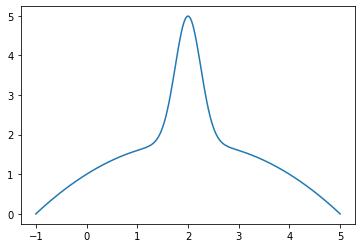

In [341]:
x = np.linspace(-1,5,200)
y = [f(x,a,b,c,mu,sigma,1.0) for x in x]
plt.plot(x,y)
plt.show()

In [343]:
xmax,ymax = maxa(f, -1.5,5, a,b,c,mu,sigma,1.0)
print("x = ",xmax,"y = ",ymax)

x =  1.999980275409694 y =  4.991538233200065


In [342]:
def try_catch(f,xmin,xmax,fmax,N,*args):
    data = []
    counter = 0
    for i in range(N):
        x = np.random.uniform(xmin,xmax)
        y = np.random.uniform(0,fmax)
        if f(x,*args) > y:
            data.append(x)
            counter +=1
    p = counter/N
    A = (xmax-xmin)*fmax
    return data
    

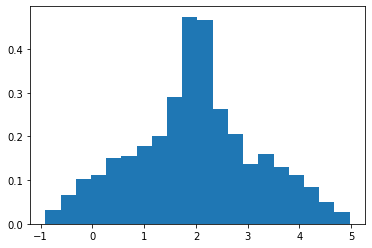

In [350]:
data = try_catch(f,-1,5,ymax,10000,a,b,c,mu,sigma,1.0)
bin_content, bin_edges, boh = plt.hist(data,bins=20,density=True)
plt.show()

In [321]:
#data2 = try_catch(f2,-1,5,maxa(f2,-1.5,5,a,b,c)[1],1000,a,b,c)
#bin_content, bin_edges, boh = plt.hist(data2,bins=20)
#plt.show()

In [351]:
yerr= 0.05*np.ones(len(bin_content))

cost = LeastSquares(bin_edges[1:],bin_content,yerr,f)
my_minuit = Minuit(cost, a=-0.2, b=0.8, c=1,mu=2,sigma=.3,totn=0.1)

#my_minuit = Minuit(cost,a=-0.2, b=0.8,c=1 )

my_minuit.migrad()
my_minuit.hesse()
display(my_minuit)
print(my_minuit.fval)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.7725 (χ²/ndof = 0.1)     │              Nfcn = 210              │
│ EDM = 0.000113 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a     │   -0.19   │   0.08    │            │            │         │         │       │
│ 1 │ b     │    0.8    │    0.4    │            │            │         │         │       │
│ 2 │ c     │   0.88    │   0.28    │            │            │         │         │       │
│ 3 │ mu    │   2.16    │   0.05    │            │            │         │         │       │
│ 4 │ sigma │   0.28    │   0.06    │            │            │         │         │       │
│ 5 │ totn  │   0.112   │   0.025   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────┐
│       │        a        b        c       mu    sigma     totn │
├───────┼───────────────────────────────────────────────────────┤
│     a │  0.00677   -0.029   -0.013  -0.0001   0.0031   1.8e-3 │
│     b │   -0.029    0.128     0.05   0.0001  -0.0132  -7.7e-3 │
│     c │   -0.013     0.05   0.0779   0.0009  -0.0094  -5.3e-3 │
│    mu │  -0.0001   0.0001   0.0009  0.00229  -0.0001       -0 │
│ sigma │   0.0031  -0.0132  -0.0094  -0.0001   0.0035   1.1e-3 │
│  totn │   1.8e-3  -7.7e-3  -5.3e-3       -0   1.1e-3 0.000616 │
└───────┴───────────────────────────────────────────────────────┘

0.7725261318949351
